# Notebook 6 - Economic Suitability 

<hr>
Economical Suitability Analysis Module is the most recent addition to AEZ framework (Figure 10). This module converts AEZ's final crop suitability (a result of the previous 5 modules) into an economic suitability. Additionally, all crops of interest are compared to the umbrella crop (crop with the highest economical potential) in order to indicate and map out its comparative advantage in terms of an attainable net revenue relative to the best available option.

Prepared by Geoinformatics Center, AIT
<hr>

### Google drive connection
In this step, we will connect to Google Drive service and mount the drive where we will start our PyAEZ project

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)


Then, installing any additional python packages that required to run PyAEZ.
If working on your own PC/machine, these additional installation will vary depending on what is already installed in your Python library. 

In [ ]:
# 'Installing neccessary packages'
# !pip install gdal
# # !pip install pyaez==2.0.0

Now, we will import the specific Python packages we need for PyAEZ.

In [ ]:
'''import supporting libraries'''
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import os
try:
    from osgeo import gdal
except:
    import gdal
import sys


Setting the working directory -- where our PyAEZ project is located.

In [195]:
'Set the working directory'
work_dir = '/Volumes/GoogleDrive/My Drive/PyAEZv2_FINAL_DRAFT' # Replace with path to your PyAEZv2 folder
os.chdir(work_dir)
sys.path.append('./pyaez/')
!pwd

# Check whether the specified path exists or not
out_path = './data_output/NB6/'
isExist = os.path.exists(out_path)
if not isExist:
   # Create a new directory because it does not exist
   os.makedirs(out_path)
   print("The new directory is created!")


/Volumes/GoogleDrive/My Drive/PyAEZv2


<hr>

## MODULE 6: Economic Suitability
Now, we will start executing the routines in Module 6


First, we initiate Module 6 Class instance by invoking the following commands:

In [184]:
# importing the Module 6: Economic Suitability
from pyaez import EconomicSuitability
econ_su = EconomicSuitability.EconomicSuitability()
import UtilitiesCalc
obj_utilities = UtilitiesCalc.UtilitiesCalc()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [176]:
# Load the geographical data/rasters
mask_path = './data_input/LAO_Admin.tif'
mask = gdal.Open(mask_path).ReadAsArray()


### Loading crop economic data and add them into the object Class

In [189]:
# Crop Economic data from regional/national statistics
# What provided here are examples ONLY. 

### For Maize
# Cost of production
cost_maize = np.array([10100, 10000, 17000, 15500]) # [THB/ha]
yield_maize = np.array([4.8, 5.5, 6.1, 8.7])/2 # [tonne/ha]


farm_price_maize = np.arange(6.5, 10., 0.5)*1000  # THB/ton

# conversion kg/ha to tonne/ha
yield_map_maize = gdal.Open(r'./data_input/LAO_Maize_CropSuitability_rain.tiff').ReadAsArray()/1000
# yield_map_maize = gdal.Open(r'./data_output/NB5/LAO_clim_soil_terr_adj_yield_rain.tif').ReadAsArray()/1000# conversion kg/ha to tonne/ha

In [190]:
# Adding into the object class
econ_su.addACrop(crop_name='maize', crop_cost=cost_maize, crop_yield=yield_maize, farm_price=farm_price_maize, yield_map=yield_map_maize)

## Economic Suitability Analysis
Calculate the net revenue of each crop based on our crop economic data

In [192]:
maize_rev = econ_su.getNetRevenue('maize') # THB/ha
maize_rev_class = econ_su.getClassifiedNetRevenue('maize')
maize_rev_norm = econ_su.getNormalizedNetRevenue('maize')

# Masking the result 
# maize_rev = np.ma.masked_where(mask==0,maize_rev)
# maize_rev_class = np.ma.masked_where(mask==0,maize_rev_class)
# maize_rev_norm = np.ma.masked_where(mask==0,maize_rev_norm)

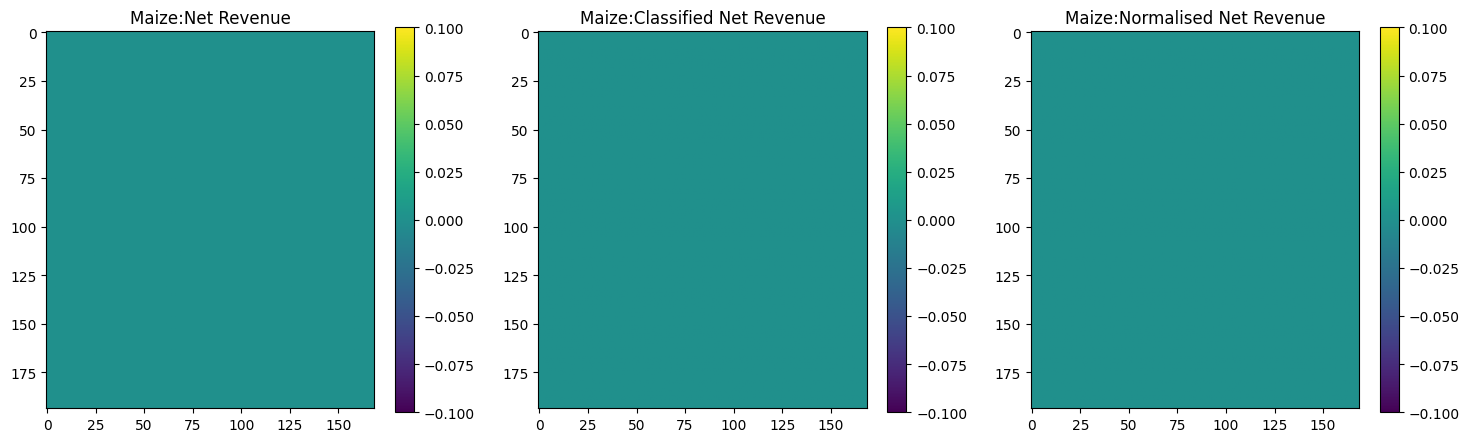

In [196]:
# visualization
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.imshow(maize_rev,vmin=0)
plt.title('Maize:Net Revenue')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.imshow(maize_rev_class, vmin=0)
plt.title('Maize:Classified Net Revenue')
plt.colorbar()


plt.subplot(1, 3, 3)
plt.imshow(maize_rev_norm, vmin=0)
plt.title('Maize:Normalised Net Revenue')
plt.colorbar()

plt.savefig("./data_output/NB6/LAO_Maize_EconomicSuitability.png",bbox_inches='tight',dpi=300)


In [ ]:
'''Save the GeoTIFF rasters'''
ref_tif = './data_input/LAO_Maize_CropSuitability_rain.tiff'
obj_utilities.saveRaster(ref_tif,
                          r'./data_output/NB6/LAO_Maize_Revenue_rain.tif', maize_rev)
obj_utilities.saveRaster(ref_tif,
                          r'./data_output/NB6/LAO_Maize_RevenueClass_rain.tif', maize_rev_class)
obj_utilities.saveRaster(ref_tif,
                          r'./data_output/NB6/LAO_Maize_RevenueNorm_rain.tif', maize_rev_norm)


---

### END OF MODULE 6: ECONOMIC SUITABILITY ANALYSIS

---